In [29]:
# Getting the Data
import pandas as pd

dataset = pd.read_csv('data/drug_consumption.csv',encoding="latin-1")
dataset = dataset.rename(columns={dataset.columns[0]: 'ID'})

# Seperating the Data
features = dataset.iloc[:,:13]
target = dataset.iloc[:, 13:]

# Copying the Data
copy_data = dataset.copy() 

attributes_to_update = target.columns

    
specific_columns = ['Age', 'Gender', 'Education', 'Country', 'Escore', 'Alcohol', 'Cannabis']
df_specific = copy_data[specific_columns]
df_specific.head()

,Age,Gender,Education,Country,Escore,Alcohol,Cannabis
0,0.49788,0.48246,-0.05921,0.96082,-0.57545,CL5,CL0
1,-0.07854,-0.48246,1.98437,0.96082,1.93886,CL5,CL4
2,0.49788,-0.48246,-0.05921,0.96082,0.80523,CL6,CL3
3,-0.95197,0.48246,1.16365,0.96082,-0.80615,CL4,CL2
4,0.49788,0.48246,1.98437,0.96082,-1.63340,CL4,CL3


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [27]:
# Changing the features of the copy to presentable titles
copy_data['Age'] = copy_data['Age'].replace(-0.95197, '18-24')
copy_data['Age'] = copy_data['Age'].replace(-0.07854, '25-34')
copy_data['Age'] = copy_data['Age'].replace(0.49788, '35-44')
copy_data['Age'] = copy_data['Age'].replace(1.09449, '45-54')
copy_data['Age'] = copy_data['Age'].replace(1.82213, '55-64')
copy_data['Age'] = copy_data['Age'].replace(2.59171, '65+')

copy_data['Gender'] = copy_data['Gender'].replace(-0.48246, 'Male')
copy_data['Gender'] = copy_data['Gender'].replace(0.48246, 'Female')

copy_data['Education'] = copy_data['Education'].replace(-2.43591, '< 16')
copy_data['Education'] = copy_data['Education'].replace(-1.73790, '16')
copy_data['Education'] = copy_data['Education'].replace(-1.43719, '17')
copy_data['Education'] = copy_data['Education'].replace(-1.22751, '18')
copy_data['Education'] = copy_data['Education'].replace(-0.61113, 'University student')
copy_data['Education'] = copy_data['Education'].replace(-0.05921, 'Cert./Dipl.')
copy_data['Education'] = copy_data['Education'].replace(0.45468, 'University Deg.')
copy_data['Education'] = copy_data['Education'].replace(1.16365, 'Masters Deg.')
copy_data['Education'] = copy_data['Education'].replace(1.98437, 'Doc. Deg.')

copy_data['Country'] = copy_data['Country'].replace(-0.09765, 'Australia')
copy_data['Country'] = copy_data['Country'].replace(0.24923, 'Canada')
copy_data['Country'] = copy_data['Country'].replace(-0.46841, 'New Zealand')
copy_data['Country'] = copy_data['Country'].replace(-0.28519, 'Other')
copy_data['Country'] = copy_data['Country'].replace(0.21128, 'Ireland')
copy_data['Country'] = copy_data['Country'].replace(0.96082, 'UK')
copy_data['Country'] = copy_data['Country'].replace(-0.57009, 'USA')

copy_data['Ethnicity'] = copy_data['Ethnicity'].replace(-0.50212, 'Asian')
copy_data['Ethnicity'] = copy_data['Ethnicity'].replace(-1.10702, 'Black')
copy_data['Ethnicity'] = copy_data['Ethnicity'].replace(1.90725, 'Black/Asian')
copy_data['Ethnicity'] = copy_data['Ethnicity'].replace(0.12600, 'White/Asian')
copy_data['Ethnicity'] = copy_data['Ethnicity'].replace(-0.22166, 'White/Black')
copy_data['Ethnicity'] = copy_data['Ethnicity'].replace(0.11440, 'Other')
copy_data['Ethnicity'] = copy_data['Ethnicity'].replace(-0.31685, 'White')

attributes_to_update = target.columns

for attribute in attributes_to_update:
    copy_data.loc[copy_data[attribute] == "CL0", attribute] = 0
    copy_data.loc[copy_data[attribute].isin(["CL1", "CL2", "CL3", "CL4", "CL5", "CL6"]), attribute] = 1
    
specific_columns = ['Age', 'Gender', 'Education', 'Country', 'Escore', 'Alcohol', 'Cannabis']
df_specific = copy_data[specific_columns]
df_specific.head()
    

,Age,Gender,Education,Country,Escore,Alcohol,Cannabis
0,35-44,Female,Cert./Dipl.,UK,-0.57545,1,0
1,25-34,Male,Doc. Deg.,UK,1.93886,1,1
2,35-44,Male,Cert./Dipl.,UK,0.80523,1,1
3,18-24,Female,Masters Deg.,UK,-0.80615,1,1
4,35-44,Female,Doc. Deg.,UK,-1.63340,1,1


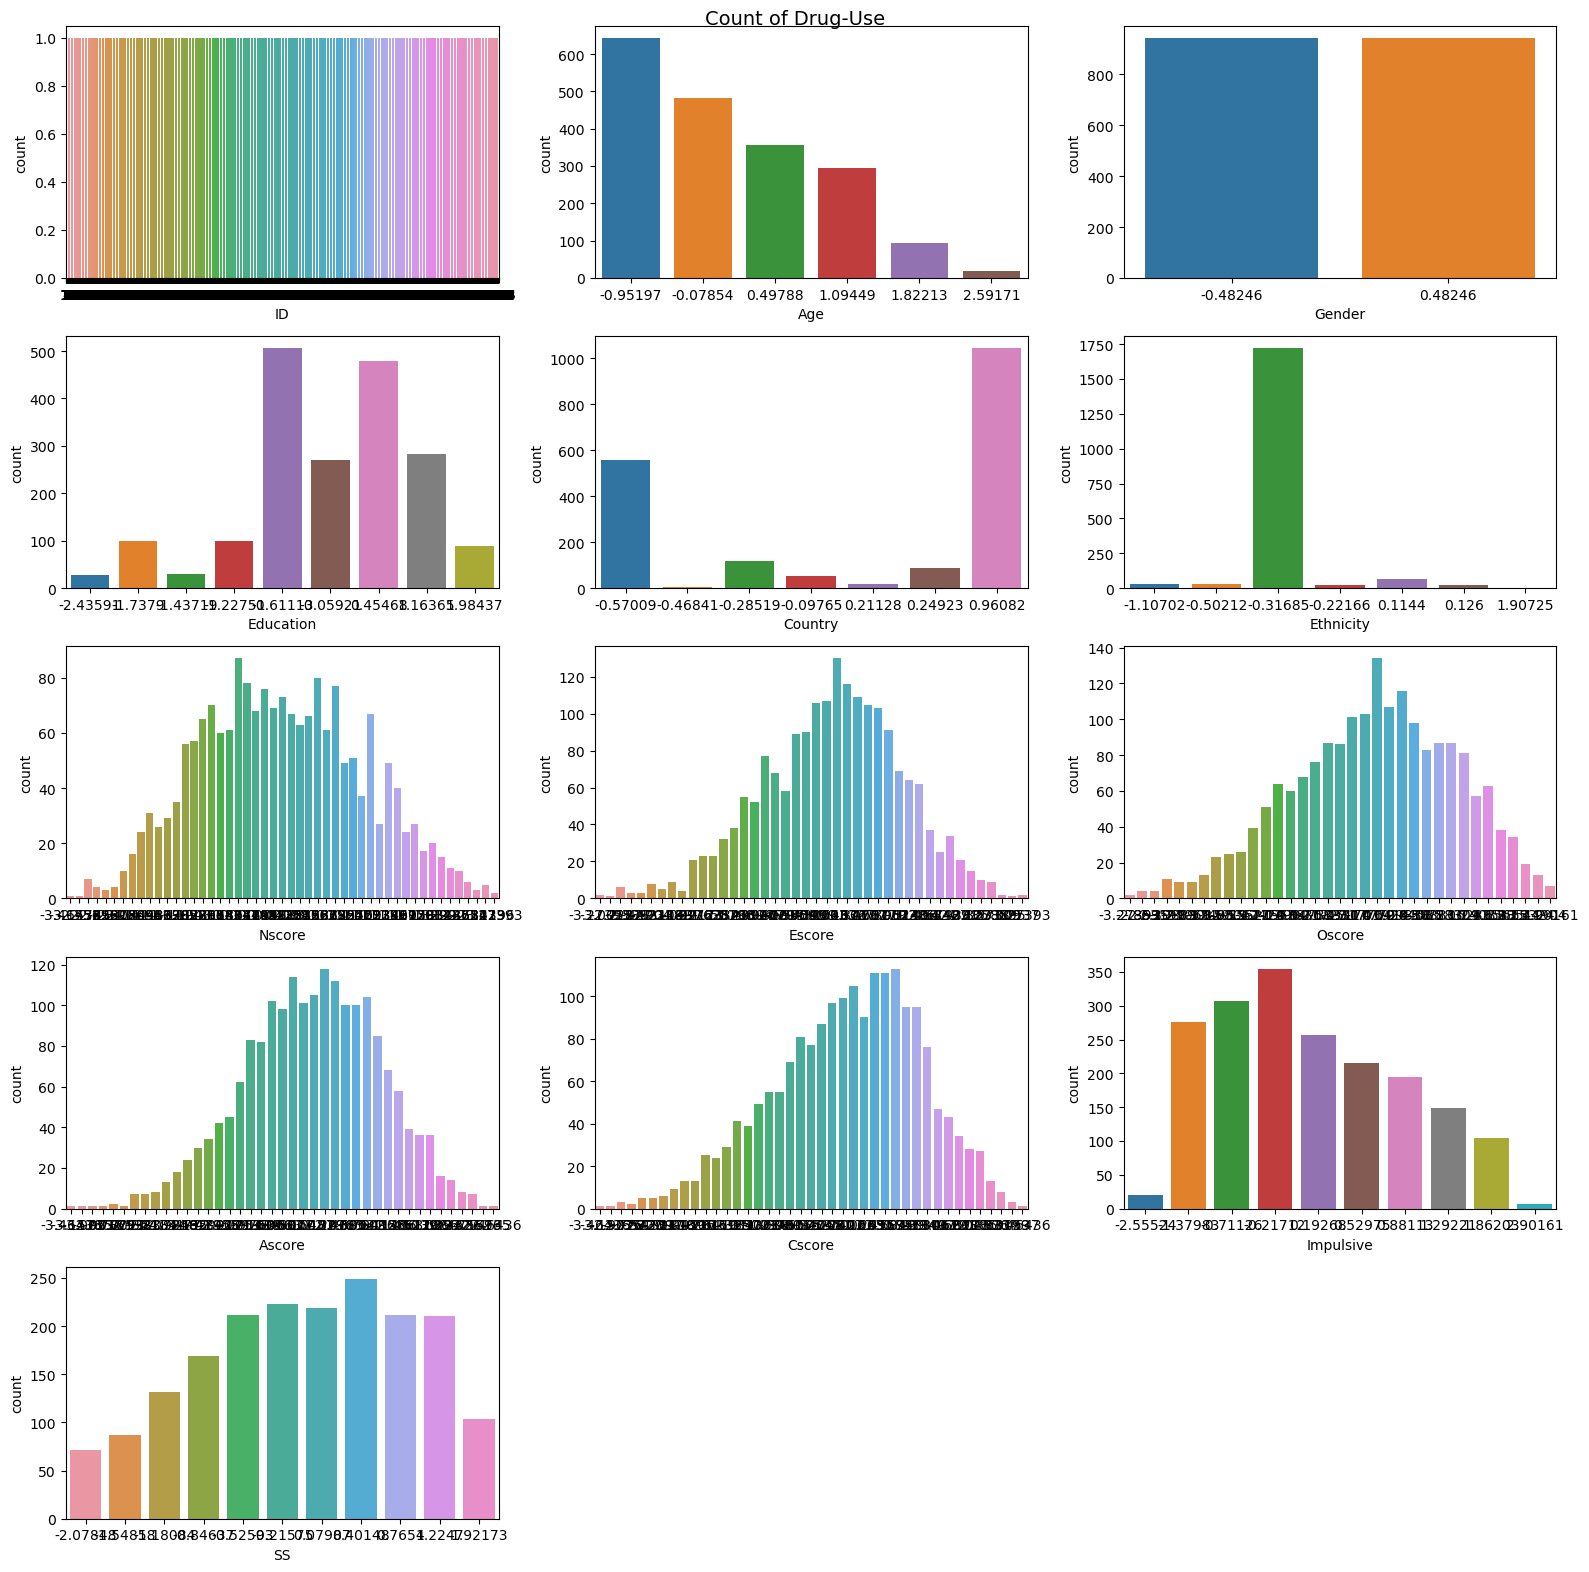

In [4]:
# Plotting the features
import matplotlib.pyplot as plt
import seaborn as sns

columns = features.columns[:13]  # Nur die ersten 13 Spalten verwenden

num_rows = 5
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))
fig.suptitle("Count of Drug-Use", fontsize=14)

for i in range(num_rows):
    for j in range(num_cols):
        k = i * num_cols + j
        if k < len(columns):
            sns.countplot(x=columns[k], data=dataset, ax=axes[i][j])
        else:
            fig.delaxes(axes[i][j])

plt.tight_layout()
plt.show()

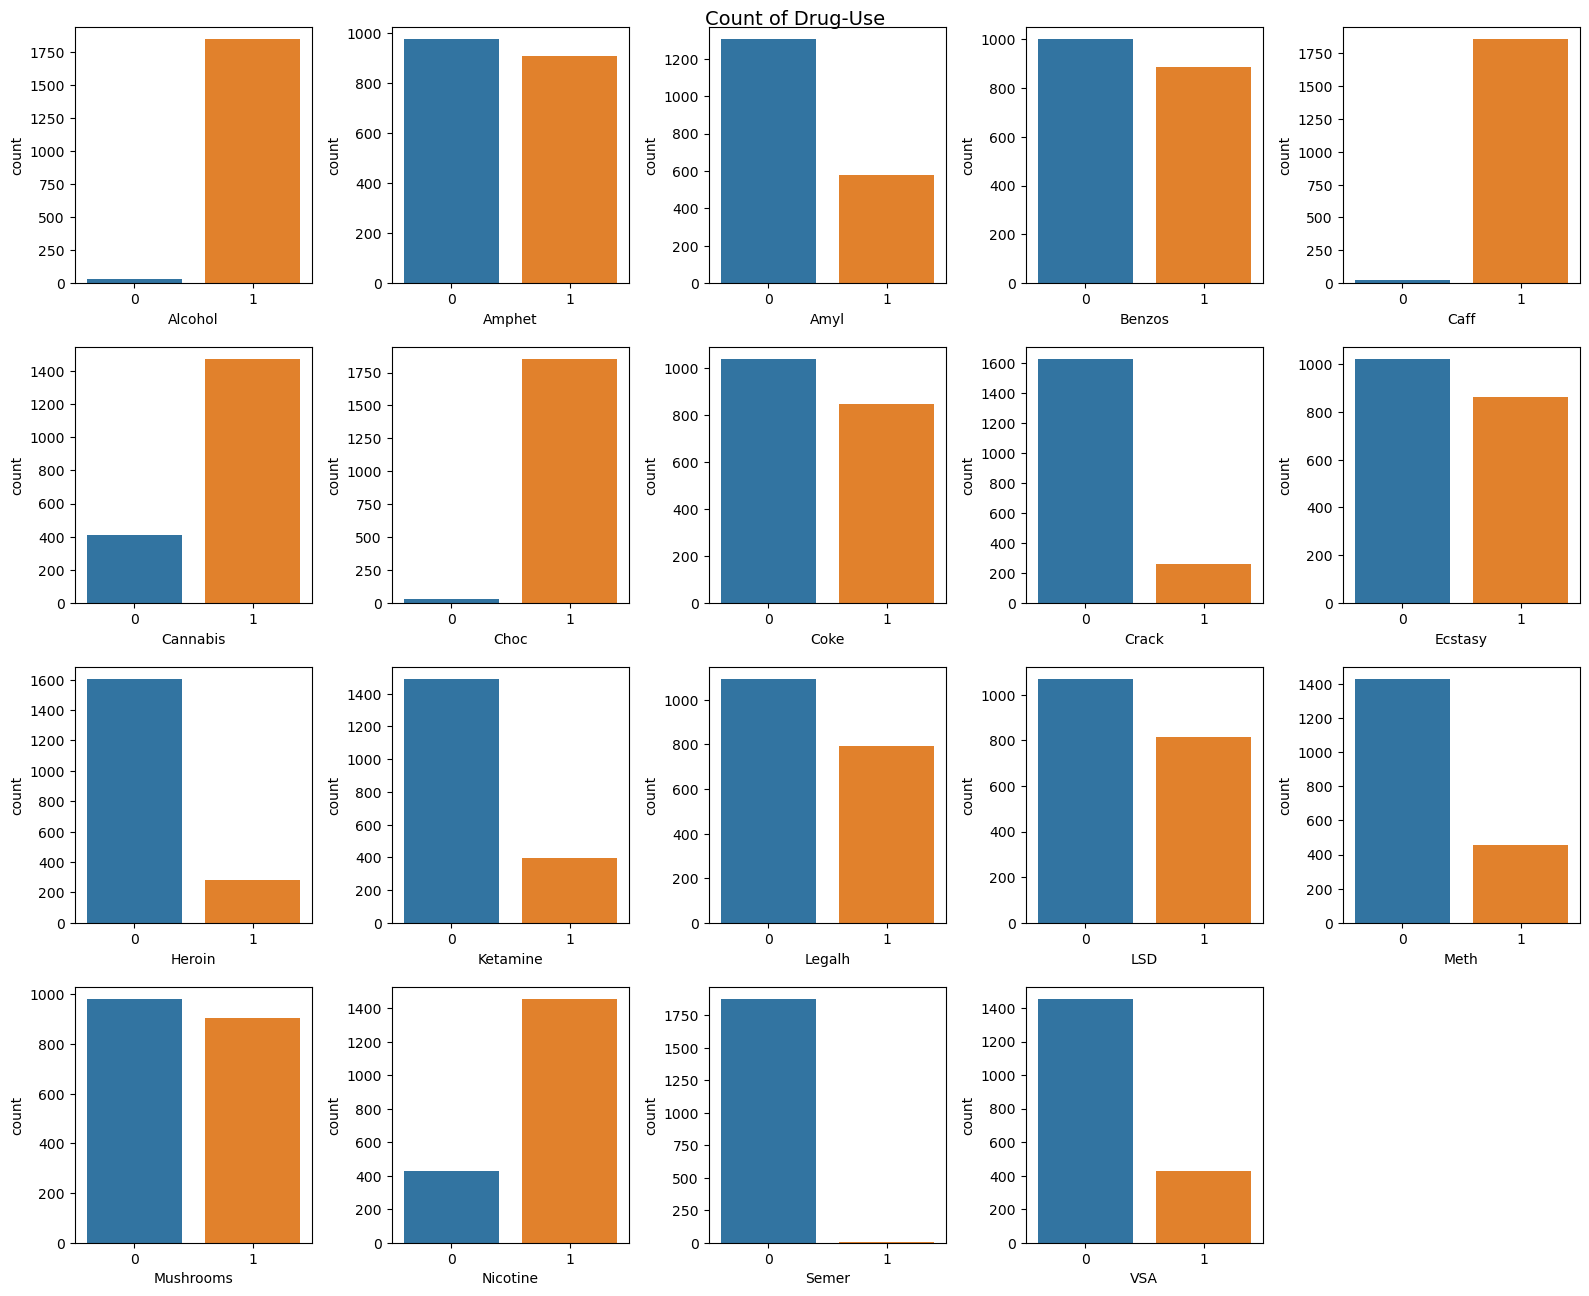

In [5]:
# Plotting the targets
columns = target.columns

num_rows = 5
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))
fig.suptitle("Count of Drug-Use", fontsize=14)

for i in range(num_rows):
    for j in range(num_cols):
        k = i * num_cols + j
        if k < len(columns):
            sns.countplot(x=columns[k], data=dataset, ax=axes[i][j])
        else:
            fig.delaxes(axes[i][j])

plt.tight_layout()
plt.show()

In [6]:
# Changing CL0 to CL6 into binary classification (0 = NO, 1 = Yes)
attributes_to_update = target.columns

for attribute in attributes_to_update:
    dataset.loc[dataset[attribute] == "CL0", attribute] = 0
    dataset.loc[dataset[attribute].isin(["CL1", "CL2", "CL3", "CL4", "CL5", "CL6"]), attribute] = 1

# Dropping every entry which claimed to have used Semeron
dataset = dataset[dataset['Semer'] != 1]
# Dropping the column 'Semer'
dataset = dataset.drop('Semer', axis=1)
# Dropping the column 'ID'
dataset = dataset.drop('ID', axis=1)
dataset.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,1,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,1,0,1,0,1,1,0,1,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,1,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,1,0,0,0,0,1,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,1,0,0,1,0,0,1,1,0


In [7]:
# Seperating the Data again
features = dataset.iloc[:,:12]
target = dataset.iloc[:, 12:]

c_feature = copy_data.iloc[:,:12]
c_target = copy_data.iloc[:, 12:]
target.head()

target = target.astype(float)
target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1877 entries, 0 to 1884
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Alcohol    1877 non-null   float64
 1   Amphet     1877 non-null   float64
 2   Amyl       1877 non-null   float64
 3   Benzos     1877 non-null   float64
 4   Caff       1877 non-null   float64
 5   Cannabis   1877 non-null   float64
 6   Choc       1877 non-null   float64
 7   Coke       1877 non-null   float64
 8   Crack      1877 non-null   float64
 9   Ecstasy    1877 non-null   float64
 10  Heroin     1877 non-null   float64
 11  Ketamine   1877 non-null   float64
 12  Legalh     1877 non-null   float64
 13  LSD        1877 non-null   float64
 14  Meth       1877 non-null   float64
 15  Mushrooms  1877 non-null   float64
 16  Nicotine   1877 non-null   float64
 17  VSA        1877 non-null   float64
dtypes: float64(18)
memory usage: 278.6 KB


In [8]:
# Seperating the data into trainset and testset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [9]:
# Creating the Model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# Fitting the Model
model.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("ROC-AUC: ", roc_auc)

Accuracy: 0.06382978723404255
Precision:  0.6619084810486716
Recall:  0.5941389520677071
F1-Score:  0.5915385871243422
ROC-AUC:  0.6091198342117363


In [11]:
# Seperating the data into dataset and testset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2, random_state=42)


In [12]:
# Creating the new Model
model = RandomForestClassifier()

# Fitting the Model
model.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("ROC-AUC: ", roc_auc)

Accuracy: 0.8457446808510638
Precision:  0.9921906253070014
Recall:  0.970010092561901
F1-Score:  0.979936335796344
ROC-AUC:  0.9295937146408794


In [14]:
input_data = pd.DataFrame(data=[[0.49788, 0.48246, -0.05921, 0.96082, 0.126, 0.31287, -0.57545, -0.58331, -0.91699, -0.00665, -0.21712, -1.18084, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]],
                          columns=dataset.columns)

erg = model.predict(input_data)
print(erg)

[[1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [15]:
# SVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = OneVsRestClassifier(SVC())
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro', zero_division=1)
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
roc_auc = roc_auc_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("ROC-AUC: ", roc_auc)

Accuracy: 0.04521276595744681
Precision:  0.7558657468671967
Recall:  0.5834546733255092
F1-Score:  0.5757341658171216
ROC-AUC:  0.6063717886022766


In [16]:
# SVM with dataset
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2, random_state=42)

#model = OneVsRestClassifier(SVC())
model = OneVsRestClassifier(svm.SVC(kernel='rbf'))

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro', zero_division=1)
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
roc_auc = roc_auc_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("ROC-AUC: ", roc_auc)

Accuracy: 0.9601063829787234
Precision:  0.9977282213257445
Recall:  1.0
F1-Score:  0.9988565468081421
ROC-AUC:  0.9350375738056896


In [17]:
# KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro', zero_division=1)
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
roc_auc = roc_auc_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("ROC-AUC: ", roc_auc)

Accuracy: 0.05053191489361702
Precision:  0.6262190519630998
Recall:  0.5874263889578887
F1-Score:  0.5969893507676214
ROC-AUC:  0.601502629143729


In [18]:
# KNN with dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro', zero_division=1)
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
roc_auc = roc_auc_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("ROC-AUC: ", roc_auc)

Accuracy: 0.2925531914893617
Precision:  0.9171274203733737
Recall:  0.8400931016647416
F1-Score:  0.8727982582833644
ROC-AUC:  0.8079345512593388


In [19]:
columns = target.columns

model = {}

for i, column in enumerate(columns):
    temp_d = dataset.drop(column, axis=1)
    temp_t = dataset[column]
    temp_t = temp_t.astype(float)

    X_train, X_test, y_train, y_test = train_test_split(temp_d, temp_t, test_size=0.2, random_state=42)

    # Creating the new Model
    model[i] = RandomForestClassifier()

    # Fitting the Model
    model[i].fit(X_train, y_train)

    predictions = model[i].predict(X_test)

    accuracy = accuracy_score(y_test, predictions)

    y_pred = model[i].predict(X_test)

    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)
    roc_auc = roc_auc_score(y_test, y_pred)

    print('===================================================')
    print('Values regarding', column)
    print("Accuracy:", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-Score: ", f1)
    print("ROC-AUC: ", roc_auc)

Values regarding Alcohol
Accuracy: 0.976063829787234
Precision:  0.988031914893617
Recall:  0.5
F1-Score:  0.4939434724091521
ROC-AUC:  0.5
Values regarding Amphet
Accuracy: 0.8164893617021277
Precision:  0.8147314476627312
Recall:  0.8216435185185185
F1-Score:  0.8150648313813825
ROC-AUC:  0.8216435185185184
Values regarding Amyl
Accuracy: 0.8138297872340425
Precision:  0.811564274651523
Recall:  0.7378793851005124
F1-Score:  0.7584789311408016
ROC-AUC:  0.7378793851005123
Values regarding Benzos
Accuracy: 0.776595744680851
Precision:  0.7799031476997578
Recall:  0.7652897303499713
F1-Score:  0.7685746944517717
ROC-AUC:  0.7652897303499713
Values regarding Caff
Accuracy: 0.9893617021276596
Precision:  0.9946808510638299
Recall:  0.5
F1-Score:  0.49732620320855614
ROC-AUC:  0.5
Values regarding Cannabis
Accuracy: 0.8909574468085106
Precision:  0.8549309008338879
Recall:  0.8469840783833436
F1-Score:  0.8508384050468791
ROC-AUC:  0.8469840783833436
Values regarding Choc
Accuracy: 0.9867

In [20]:
input_data = pd.DataFrame(data=[[-0.07854, -0.48246, 1.98437, 0.96082, -0.31685, -0.67825, 1.93886, 1.43533, 0.76096, -0.14277, -0.71126, -0.21575, 1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0]],
                          columns=dataset.columns)
drugs = ['Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','VSA']


for i, column in enumerate(drugs):
    new_data = input_data.drop(drugs[i], axis=1)
    erg = model[i].predict(new_data)
    print(drugs[i],":",erg)



Alcohol : [1.]
Amphet : [1.]
Amyl : [1.]
Benzos : [0.]
Caff : [1.]
Cannabis : [1.]
Choc : [1.]
Coke : [1.]
Crack : [0.]
Ecstasy : [1.]
Heroin : [0.]
Ketamine : [1.]
Legalh : [0.]
LSD : [1.]
Meth : [1.]
Mushrooms : [0.]
Nicotine : [1.]
VSA : [0.]
